### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Try and Build Regression model using all the techniques of regression: Linear, Ridge, Lasso, Decision Tree and XGboost

In [1]:
# importing required data and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the train data
df=pd.read_csv("trainbigmart.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [2]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.size

102276

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# check for the null values and explore shape as well
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values – Item_Weight and Outlet_Size.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column. You can try different methods to impute missing values as well.



<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Size'>

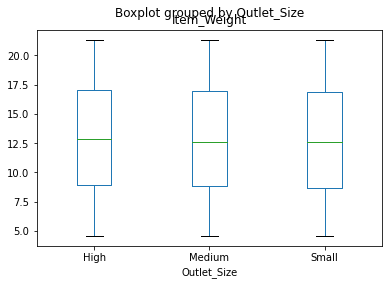

In [8]:
#create box plot on Item weight
df.boxplot(by="Outlet_Size",column=["Item_Weight"],grid=False)

In [9]:
# impute missing values in item weight by mean
mean_value=df["Item_Weight"].mean()
df["Item_Weight"].fillna(value=mean_value,inplace=True)

# impute outlet size in training data by mode
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [10]:
# check for the null values again
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Explore the categorical columns

In [11]:
x=df.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y=df.Item_Outlet_Sales


Encode the categorical variables

To check the categorical variables in the data, you can use the train_data.dtypes() function. This will give you a list of the data types against each variable. For the BigMart sales data, we have the following categorical variable –

Item_Fat_Content

Item_Type,

Outlet_Identifier

Outlet_Size,

Outlet_Location_Type, and

Outlet_Type

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Item_Fat_Content',
                    'Item_Type',
                    'Outlet_Identifier',
                    'Outlet_Size',
                    'Outlet_Location_Type',
                    'Outlet_Type']
le = LabelEncoder()
# apply le on categorical feature columns
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))
print(x.head(10))

   Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0     9.300000                 1         0.016047          4  249.8092   
1     5.920000                 2         0.019278         14   48.2692   
2    17.500000                 1         0.016760         10  141.6180   
3    19.200000                 2         0.000000          6  182.0950   
4     8.930000                 1         0.000000          9   53.8614   
5    10.395000                 2         0.000000          0   51.4008   
6    13.650000                 2         0.012741         13   57.6588   
7    12.857645                 1         0.127470         13  107.7622   
8    16.200000                 2         0.016687          5   96.9726   
9    19.200000                 2         0.094450          5  187.8214   

   Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                  9                       1999            1   
1                  3                       2009          

In [13]:
print(x.Outlet_Size.value_counts())
print(x.Outlet_Size.nunique())

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64
3


In [14]:
for i in categorical_cols:
    print(x[i].value_counts())

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64
5    935
1    932
8    930
9    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64
1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64
2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64
1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64


Explore categorical columns after label encoding


### Scale the data:

So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar

In [15]:
#apply standard scaler on Item MRP column only
MRP=df["Item_MRP"]
print(MRP)
print(type(MRP))

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64
<class 'pandas.core.series.Series'>


In [16]:
ItemMRP=pd.DataFrame(MRP)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler(copy=True, with_mean=True, with_std=True)
sample_scaled=scaler.fit_transform(ItemMRP)
print(sample_scaled)
print()
print(ItemMRP)

[[ 1.74745381]
 [-1.48902325]
 [ 0.01004021]
 ...
 [-0.89720755]
 [-0.60797692]
 [-1.05226104]]

      Item_MRP
0     249.8092
1      48.2692
2     141.6180
3     182.0950
4      53.8614
...        ...
8518  214.5218
8519  108.1570
8520   85.1224
8521  103.1332
8522   75.4670

[8523 rows x 1 columns]


### Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [18]:
# importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier


# separate the independent and target variable
print(x.shape)
print(y.shape)

# randomly split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print()
# shape of train and test splits
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8523, 10)
(8523,)

(6392, 10)
(2131, 10)
(6392,)
(2131,)


In [19]:
x_train.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

# Linear Regression

In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
#print the intercept value
model.intercept_

1570.7043334279774

In [22]:
model.coef_

array([ 1.08262652e+00,  3.01462015e+01, -1.51579916e+03, -9.04998122e-01,
        1.57189418e+01,  6.00208434e+01, -1.15573666e+00, -3.19116527e+02,
       -1.99940917e+02,  8.83098900e+02])

In [23]:
o = df.drop(["Item_Outlet_Sales","Item_Identifier"], axis=1)
#dataframe of independent variables
z = pd.DataFrame(model.coef_, index=o.columns)
z

,0
Item_Weight,1.082627
Item_Fat_Content,30.146202
Item_Visibility,-1515.799155
Item_Type,-0.904998
Item_MRP,15.718942
Outlet_Identifier,60.020843
Outlet_Establishment_Year,-1.155737
Outlet_Size,-319.116527
Outlet_Location_Type,-199.940917
Outlet_Type,883.098900


In [24]:
y_pred = model.predict(x_test)
y_pred

array([ 578.08040675, 1816.98498482, 3111.4248345 , ...,  839.23546496,
       2303.32522459,  665.70044309])

In [25]:
model.score(x_test,y_test)

0.508092069305689

In [26]:
#error metric computations (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)#actual y value, predicted y value
rmse = sqrt(mse)
rmse

1193.5377775393213

In [27]:
y_predtrain = model.predict(x_train)
y_predtrain

array([2605.48401975, 3709.60440758, 1944.83370525, ..., 2246.54872165,
       -805.35959479, 4510.59375362])

In [28]:
model.score(x_train,y_train)

0.5106994251946155

In [29]:
#error metric computations
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_train, y_predtrain)#acutal y value, predicted y value
rmse = sqrt(mse)
rmse #margin of error

1194.669454019709

ideally, test accuracy should be greater than the train accuracy

if test accuracy is too low than train accuracy: overfitting

In [30]:

print("Training set score: {:.2f}".format(model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(model.score(x_test, y_test)))

Training set score: 0.51
Test set score: 0.51


# Ridge Regressor

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [32]:
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [33]:
#R2 score
ridge.score(x_test,y_test)

#test score

0.5081630312137948

In [34]:
#R2 score
ridge.score(x_train,y_train)

#train score

0.5106926113583621

In [35]:
y_pred = ridge.predict(x_test)

#margin of error-test data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_test,y_pred)
rmse = mse**0.5
rmse
#root mean squared error is used as the general metric of error for these models

1193.4516854400224

In [36]:
y_pred_train = ridge.predict(x_train)

#margin of error-train data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_train,y_pred_train)
rmse = mse**0.5
rmse

1194.6777722744957

In [37]:
ridge.intercept_

1474.234848917933

In [38]:
ridge.coef_

array([ 1.09113550e+00,  2.99400764e+01, -1.42652557e+03, -8.64987502e-01,
        1.57194346e+01,  6.03856981e+01, -1.11150762e+00, -3.19825591e+02,
       -1.99208047e+02,  8.83339135e+02])

In [39]:
o = df.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
o.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [40]:
pd.DataFrame(ridge.coef_,index=o.columns)

,0
Item_Weight,1.091136
Item_Fat_Content,29.940076
Item_Visibility,-1426.525566
Item_Type,-0.864988
Item_MRP,15.719435
Outlet_Identifier,60.385698
Outlet_Establishment_Year,-1.111508
Outlet_Size,-319.825591
Outlet_Location_Type,-199.208047
Outlet_Type,883.339135


# RidgeCV


In [41]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from numpy import arange

#instantiate repeated k-fold
rcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)

#instantiate ridgecv
ridgecv = RidgeCV(alphas=arange(0.1, 1, 0.01), cv=rcv, scoring='neg_mean_absolute_error')

#fitting ridge model
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
        scoring='neg_mean_absolute_error')

In [42]:
ridgecv.alpha_

0.4299999999999998

In [43]:
ridgecv.intercept_

1527.4944356059382

In [44]:
ridgecv.coef_

array([ 1.08639873e+00,  3.00545285e+01, -1.47606494e+03, -8.87206336e-01,
        1.57191617e+01,  6.01804089e+01, -1.13590263e+00, -3.19437613e+02,
       -1.99629861e+02,  8.83216755e+02])

In [45]:
o = df.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)
pd.DataFrame(ridgecv.coef_,index = o.columns)

,0
Item_Weight,1.086399
Item_Fat_Content,30.054528
Item_Visibility,-1476.064938
Item_Type,-0.887206
Item_MRP,15.719162
Outlet_Identifier,60.180409
Outlet_Establishment_Year,-1.135903
Outlet_Size,-319.437613
Outlet_Location_Type,-199.629861
Outlet_Type,883.216755


In [46]:
#r squared (Test data):  coeff of determination
ridgecv.score(x_test,y_test)

0.5081254759655633

In [47]:
#r squared (Train data):
ridgecv.score(x_train,y_train)

0.5106980760464639

In [48]:
#predictions on the training and testing sets

y_test_predict_rr = ridgecv.predict(x_test)
y_train_predict_rr = ridgecv.predict(x_train)

In [49]:
from sklearn import metrics

print("Ridge Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rr))

Ridge Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 894.4361567623987
Mean Squared Error         : 1427239.0396821601
Root Mean Squared Error    : 1194.671101049222
R2 Score                   : 0.5106980760464639

-----------------Testing Performance:-----------------
Mean Absolute Error        : 906.4854427396984
Mean Squared Error         : 1424435.682963601
Root Mean Squared Error    : 1193.4972488295066
R2 Score                   : 0.5081254759655633


# Lasso Regressor

In [50]:
lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [51]:
#R2 score
lasso.score(x_test,y_test)
#test score

0.5082046444351893

In [52]:
#R2 score
lasso.score(x_train,y_train)

#train score

0.5105572973318024

In [53]:
y_pred = lasso.predict(x_test)

#margin of error-test data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_test,y_pred)
rmse = mse**0.5
rmse

1193.4011967386002

In [54]:
y_pred_train = lasso.predict(x_train)

#margin of error-train data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_train,y_pred_train)
rmse = mse**0.5
rmse

1194.8429501247517

In [55]:
lasso.coef_

array([ 1.06836773e+00,  2.69047218e+01, -1.12181144e+03, -7.04492880e-01,
        1.57205049e+01,  6.30635475e+01, -1.04142726e+00, -3.16523024e+02,
       -1.86923593e+02,  8.79097321e+02])

In [56]:
o = df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
o.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [57]:
pd.DataFrame(lasso.coef_,index=o.columns)

,0
Item_Weight,1.068368
Item_Fat_Content,26.904722
Item_Visibility,-1121.811443
Item_Type,-0.704493
Item_MRP,15.720505
Outlet_Identifier,63.063548
Outlet_Establishment_Year,-1.041427
Outlet_Size,-316.523024
Outlet_Location_Type,-186.923593
Outlet_Type,879.097321


# LassoCV

In [58]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from numpy import arange

#instantiate repeated k-fold
lcv = RepeatedKFold(n_splits=50,n_repeats=3,random_state=42)

#instantiate LassoCV
lasso = LassoCV(alphas=arange(0,1,0.01), cv=lcv) #default scoring is r squared

#fitting lasso model
lasso.fit(x_train,y_train)

C:\Users\Sourav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Sourav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4460495857.529491, tolerance: 1829414.4467785847
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Sourav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Sourav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4485072182.1954

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=50, random_state=42))

In [59]:
lasso.alpha_

0.01

In [60]:
lasso.intercept_

1567.9250248469743

In [61]:
lasso.coef_

array([ 1.08248478e+00,  3.01137912e+01, -1.51185931e+03, -9.02992537e-01,
        1.57189575e+01,  6.00513760e+01, -1.15459748e+00, -3.19090442e+02,
       -1.99810279e+02,  8.83058642e+02])

In [62]:
o = df.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
pd.DataFrame(lasso.coef_,index = o.columns)

,0
Item_Weight,1.082485
Item_Fat_Content,30.113791
Item_Visibility,-1511.859310
Item_Type,-0.902993
Item_MRP,15.718957
Outlet_Identifier,60.051376
Outlet_Establishment_Year,-1.154597
Outlet_Size,-319.090442
Outlet_Location_Type,-199.810279
Outlet_Type,883.058642


In [63]:
#r squared (Test data):  coeff of determination
lasso.score(x_test,y_test)

0.5080946826177821

In [64]:
#r squared (Train data):
lasso.score(x_train,y_train)

0.5106994109768266

In [65]:
#predictions on the training and testing sets

y_test_predict_lr = lasso.predict(x_test)
y_train_predict_lr = lasso.predict(x_train)

In [66]:
from sklearn import metrics
print("Lasso Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_lr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_lr))

Lasso Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 894.4349839746249
Mean Squared Error         : 1427235.1458394513
Root Mean Squared Error    : 1194.6694713766865
R2 Score                   : 0.5106994109768266

-----------------Testing Performance:-----------------
Mean Absolute Error        : 906.529502628302
Mean Squared Error         : 1424524.8584366825
Root Mean Squared Error    : 1193.5346071382608
R2 Score                   : 0.5080946826177821


# Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor


#instantiating the decison tree model
reg_dt = DecisionTreeRegressor(random_state = 42)

#fitting the mode
reg_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [68]:
#making predictions on the training and testing sets

y_train_predict_dtr = reg_dt.predict(x_train)
y_test_predict_dtr = reg_dt.predict(x_test)

In [69]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 0.0
Mean Squared Error         : 0.0
Root Mean Squared Error    : 0.0
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 1078.6300554669167
Mean Squared Error         : 2476115.0081520905
Root Mean Squared Error    : 1573.567605205474
R2 Score                   : 0.14496814025652505


# Tuning Parameters Using GridsearchCV

In [70]:
params = {'max_depth':[2,3,5,10,20],
         'min_samples_leaf':[5,10,20,50],
         'min_samples_split':[2,5,10,20]
         }

In [71]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params,
                          cv=10,
                          scoring='neg_mean_squared_error')
#grid search helps in hyperparameter tuning

In [72]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [73]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [74]:
params2 = {'max_depth':range(1,10),
         'min_samples_leaf':range(50,60),
         'min_samples_split':range(2,5)
          }

In [75]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params2,
                          cv=10,
                          scoring='neg_mean_squared_error')

In [76]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(50, 60),
                         'min_samples_split': range(2, 5)},
             scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 59, 'min_samples_split': 3}

In [78]:
reg_dt_tuned = DecisionTreeRegressor(max_depth= 6,
                                     min_samples_leaf= 59,
                                     min_samples_split= 2
                                    )
reg_dt_tuned = reg_dt_tuned.fit(x_train,y_train)

In [79]:
y_test_predict_dtr = reg_dt_tuned.predict(x_test)
y_train_predict_dtr = reg_dt_tuned.predict(x_train)

In [80]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 744.1040489663669
Mean Squared Error         : 1131914.0211452364
Root Mean Squared Error    : 1063.9144801840214
R2 Score                   : 0.6119446757708595

-----------------Testing Performance:-----------------
Mean Absolute Error        : 764.4917665516176
Mean Squared Error         : 1184436.457044781
Root Mean Squared Error    : 1088.318178220313
R2 Score                   : 0.5910000531959272


# XGBoost

In [81]:
import xgboost as xgb # XGBoost


#instantiating model
reg_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                           eval_metric='rmsle',
                           seed=42,
                           use_label_encoder=False)
reg_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [82]:
#making predictions on training and testing sets

y_test_predict_xgb = reg_xgb.predict(x_test)

y_train_predict_xgb = reg_xgb.predict(x_train)

In [83]:
from sklearn import metrics
print("XGBoost Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_xgb))

XGBoost Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 441.23148930852693
Mean Squared Error         : 376325.4558606685
Root Mean Squared Error    : 613.4537112616309
R2 Score                   : 0.8709839315870149

-----------------Testing Performance:-----------------
Mean Absolute Error        : 832.8975043467077
Mean Squared Error         : 1402479.8678404563
Root Mean Squared Error    : 1184.2634283977768
R2 Score                   : 0.5157070791524592


# Tuning Round 1

In [84]:
params = {
    "max_depth" : [3,4,5],
    'learning_rate' : [0.1,0.01,0.05],
    'gamma' : [0,0.25,1.0] ,
    'scale_pos_weight' : [1,3,5],
    'reg_lambda' : [0,1.0,10.0]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)


C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\li

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                 

In [85]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

# Tuning Round 2

In [86]:
params2 = {
    "max_depth" : [4],
    'learning_rate' : [0.1],
    'gamma' : [0] ,
    'scale_pos_weight' : [1],
    'reg_lambda' : [10,100,500,1000]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),
                              param_grid=params2,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)

C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sourav\anaconda3\li

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                         

In [87]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 1}

In [88]:
reg_xgb = xgb.XGBRegressor(seed=42,
                        objective='reg:squarederror',
                        gamma=0,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
reg_xgb.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmsle',
            eval_set=[(x_test, y_test)])

[0]	validation_0-rmsle:2.26597
[1]	validation_0-rmsle:1.65037
[2]	validation_0-rmsle:1.29388
[3]	validation_0-rmsle:1.05343
[4]	validation_0-rmsle:0.90584
[5]	validation_0-rmsle:0.81392
[6]	validation_0-rmsle:0.74450
[7]	validation_0-rmsle:0.69192
[8]	validation_0-rmsle:0.65998
[9]	validation_0-rmsle:0.63095
[10]	validation_0-rmsle:0.61414
[11]	validation_0-rmsle:0.60132
[12]	validation_0-rmsle:0.59372
[13]	validation_0-rmsle:0.59126
[14]	validation_0-rmsle:0.59315
[15]	validation_0-rmsle:0.60363
[16]	validation_0-rmsle:nan
[17]	validation_0-rmsle:nan
[18]	validation_0-rmsle:0.59055
[19]	validation_0-rmsle:nan
[20]	validation_0-rmsle:nan
[21]	validation_0-rmsle:nan
[22]	validation_0-rmsle:nan
[23]	validation_0-rmsle:nan
[24]	validation_0-rmsle:nan
[25]	validation_0-rmsle:nan
[26]	validation_0-rmsle:nan
[27]	validation_0-rmsle:nan
[28]	validation_0-rmsle:nan


C:\Users\Sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
#making predictions on training and testing sets
y_test_predict_xgb = reg_xgb.predict(x_test)
y_train_predict_xgb = reg_xgb.predict(x_train)

In [90]:
from sklearn import metrics
print("XGBoost Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_xgb))

XGBoost Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 819.1878982519191
Mean Squared Error         : 1456337.1041500254
Root Mean Squared Error    : 1206.7879284074834
R2 Score                   : 0.5007223547190671

-----------------Testing Performance:-----------------
Mean Absolute Error        : 831.0074778232117
Mean Squared Error         : 1449971.986913027
Root Mean Squared Error    : 1204.1478260218
R2 Score                   : 0.49930748755025667
